# Energy Minimization for 3D Problems
After familiarizing yourself with the formulation, it is time to apply the knowledge to a practical example. This tutorial will go over varying penalization weights for a geometry in 3D.

Initial B-spline error:
Relative surface error: 
   Max: 5.075e-04
   RMS: 1.797e-04
Gradient error: 
   Max: 4.959e-02 
   RMS: 2.443e-02


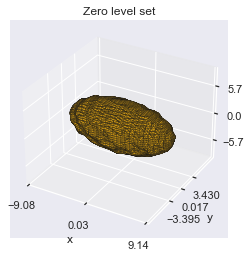

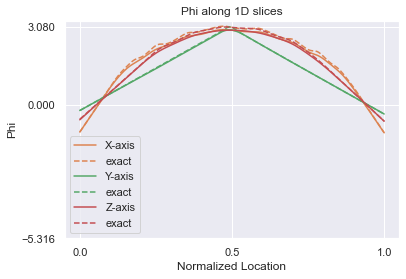

In [12]:
from lsdo_genie import Genie3D
from lsdo_genie.utils.geometric_shapes import Ellipsoid
import numpy as np
from lsdo_genie.utils import enlarged_bbox

num_pts = 100
e = Ellipsoid(8,3,5)
surface_points = e.surface_points(num_pts)
surface_normals = e.unit_normals(num_pts)
custom_domain = enlarged_bbox(surface_points,percent=15.)
genie = Genie3D(verbose=False)
genie.input_point_cloud(
    surface_points=surface_points,
    surface_normals=surface_normals,
)
genie.config(
    domain=custom_domain,
    max_control_points=40,
    min_ratio=0.75,
)
print("Initial B-spline error:")
genie.compute_errors()
genie.visualize()

## Optimize with specific the penalization weights
After optimization, the error terms of the function will decrease, sometimes by multiple orders of magnitude.

Time to solve: 2.743 seconds
Optimized B-spline error:
Relative surface error: 
   Max: 2.832e-06
   RMS: 1.398e-06
Gradient error: 
   Max: 4.362e-05 
   RMS: 2.395e-05


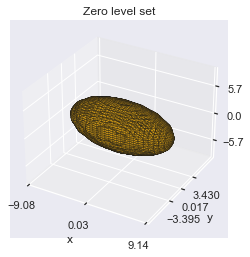

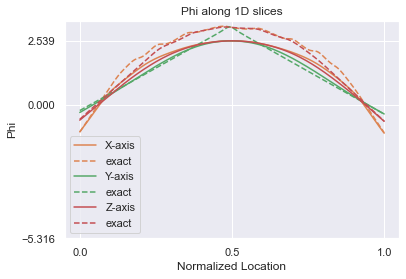

In [13]:
genie.solve_energy_minimization(
    Ln=1e0,
    Lr=1e-4,
)
print(f"Time to solve: {genie.timetosolve:1.3f} seconds")
print("Optimized B-spline error:")
genie.compute_errors()
genie.visualize()

## Varying the penalization weights
It is encouraged to explore various results with your 3D geometric shape.
Note that it is more computationally expensive to solve, so make educated guesses based on numerous examples provided in these docs.
Below is a bit of code that will simulate different penalization weights we encourage you to run.
* It is always recommended that $\lambda_n>\lambda_r$.

In [14]:
# for Ln in [1e2, 1e-2]:
#     for Lr in [1e-2, 1e-6]:
#         genie.solve_energy_minimization(
#             Ln=Ln,
#             Lr=Lr,
#         )
#         print(f"Ln={Ln:1.0e}, Lr={Lr:1.0e}")
#         genie.visualize()
#         genie.compute_errors()
#         print("--------------------------")